# Linear Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv('views.csv')

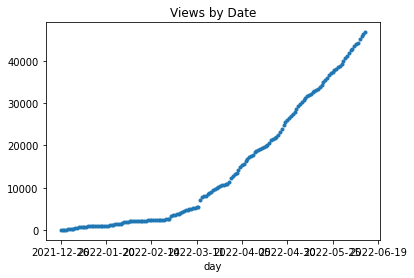

In [5]:
df.set_index('day')['cumsum_views'] \
    .plot(style='.', title='Views by Date')
plt.show()

In [7]:
X = (
    df.query("cumsum_views > 5_000")
    .set_index("day_count")["cumsum_views"]
    .index
)
X = X.values.reshape(-1, 1)

y = (
    df.query("cumsum_views > 5_000")
    .set_index("day_count")["cumsum_views"]
    .values
)

In [8]:
X.shape, y.shape

((96, 1), (96,))

# Model

In [12]:
lr = LinearRegression()
lr.fit(X, y)
pred = lr.predict(df['day_count'].values.reshape(-1,1))
df['pred'] = pred

# Plot!

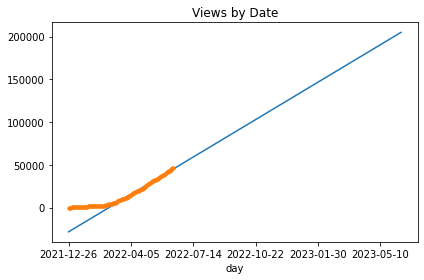

In [14]:
fig, ax= plt.subplots()
df.set_index('day')['pred'].plot()
df.set_index('day')['cumsum_views'].plot(style='.', title='Views by Date')
plt.tight_layout()

In [20]:
df.query('pred > 100_000')['day'].min()

'2022-10-16'